In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdfs-log-dataset/HDFS.log
/kaggle/input/hdfs-log-dataset/preprocessed/HDFS.npz
/kaggle/input/hdfs-log-dataset/preprocessed/Event_occurrence_matrix.csv
/kaggle/input/hdfs-log-dataset/preprocessed/Event_traces.csv
/kaggle/input/hdfs-log-dataset/preprocessed/anomaly_label.csv
/kaggle/input/hdfs-log-dataset/preprocessed/HDFS.log_templates.csv


In [26]:
import pandas as pd
import numpy as np
import json  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df= pd.read_csv('/kaggle/input/hdfs-log-dataset/preprocessed/Event_occurrence_matrix.csv')
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,BlockId,Label,Type,E1,E2,E3,E4,E5,E6,E7,...,E20,E21,E22,E23,E24,E25,E26,E27,E28,E29
0,blk_-1608999687919862906,Success,NaN,0,0,203,0,10,7,0,...,0,10,1,10,0,4,10,0,0,0
1,blk_7503483334202473044,Success,NaN,0,2,1,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
2,blk_-3544583377289625738,Fail,21.0,0,0,203,0,3,0,0,...,1,3,1,3,0,0,3,0,0,0
3,blk_-9073992586687739851,Success,NaN,0,3,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
4,blk_7854771516489510256,Success,NaN,0,3,1,15,3,0,0,...,0,3,1,3,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575056,blk_1019720114020043203,Success,NaN,0,0,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
575057,blk_-2683116845478050414,Success,NaN,0,0,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
575058,blk_5595059397348477632,Success,NaN,0,0,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
575059,blk_1513937873877967730,Success,NaN,0,0,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0


In [28]:
df1= pd.read_csv('/kaggle/input/hdfs-log-dataset/preprocessed/Event_traces.csv')
df1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BlockId,Label,Type,Features,TimeInterval,Latency
0,blk_-1608999687919862906,Success,NaN,"[E5,E22,E5,E5,E11,E11,E9,E9,E11,E9,E26,E26,E26...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3802
1,blk_7503483334202473044,Success,NaN,"[E5,E5,E22,E5,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3802
2,blk_-3544583377289625738,Fail,21.0,"[E5,E22,E5,E5,E11,E9,E11,E9,E11,E9,E3,E26,E26,...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",3797
3,blk_-9073992586687739851,Success,NaN,"[E5,E22,E5,E5,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",50448
4,blk_7854771516489510256,Success,NaN,"[E5,E5,E22,E5,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 1.0, 48.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",50583
...,...,...,...,...,...,...
575056,blk_1019720114020043203,Success,NaN,"[E5,E22,E5,E5,E26,E11,E9,E11,E9,E11,E9,E26,E26...","[0.0, 1.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",128
575057,blk_-2683116845478050414,Success,NaN,"[E5,E22,E5,E5,E11,E9,E26,E11,E9,E11,E9,E26,E26...","[0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",120
575058,blk_5595059397348477632,Success,NaN,"[E5,E5,E5,E22,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",111
575059,blk_1513937873877967730,Success,NaN,"[E5,E5,E5,E22,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",106


In [29]:
df2 =pd.read_csv('/kaggle/input/hdfs-log-dataset/preprocessed/HDFS.log_templates.csv')
df2

,EventId,EventTemplate
0,E1,[*]Adding an already existing block[*]
1,E2,[*]Verification succeeded for[*]
2,E3,[*]Served block[*]to[*]
3,E4,[*]Got exception while serving[*]to[*]
4,E5,[*]Receiving block[*]src:[*]dest:[*]
5,E6,[*]Received block[*]src:[*]dest:[*]of size[*]
6,E7,[*]writeBlock[*]received exception[*]
7,E8,[*]PacketResponder[*]for block[*]Interrupted[*]
8,E9,[*]Received block[*]of size[*]from[*]
9,E10,[*]PacketResponder[*]Exception[*]


In [30]:
df3 =pd.read_csv('/kaggle/input/hdfs-log-dataset/preprocessed/anomaly_label.csv')
df3

,BlockId,Label
0,blk_-1608999687919862906,Normal
1,blk_7503483334202473044,Normal
2,blk_-3544583377289625738,Anomaly
3,blk_-9073992586687739851,Normal
4,blk_7854771516489510256,Normal
...,...,...
575056,blk_1019720114020043203,Normal
575057,blk_-2683116845478050414,Normal
575058,blk_5595059397348477632,Normal
575059,blk_1513937873877967730,Normal


In [31]:
data = np.load('/kaggle/input/hdfs-log-dataset/preprocessed/HDFS.npz', allow_pickle=True)


In [32]:
print(data.files)

['x_data', 'y_data']


In [33]:
# concatenated_df = pd.concat([df, df1, df2, df3], axis=1)
# concatenated_df.head()

In [34]:
combined_df = pd.concat([df, df1, df2, df3], axis=1)
df = combined_df.loc[:, ~combined_df.columns.duplicated()]

In [35]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,BlockId,Label,Type,E1,E2,E3,E4,E5,E6,E7,...,E25,E26,E27,E28,E29,Features,TimeInterval,Latency,EventId,EventTemplate
0,blk_-1608999687919862906,Success,NaN,0,0,203,0,10,7,0,...,4,10,0,0,0,"[E5,E22,E5,E5,E11,E11,E9,E9,E11,E9,E26,E26,E26...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3802,E1,[*]Adding an already existing block[*]
1,blk_7503483334202473044,Success,NaN,0,2,1,0,3,0,0,...,0,3,0,0,0,"[E5,E5,E22,E5,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3802,E2,[*]Verification succeeded for[*]
2,blk_-3544583377289625738,Fail,21.0,0,0,203,0,3,0,0,...,0,3,0,0,0,"[E5,E22,E5,E5,E11,E9,E11,E9,E11,E9,E3,E26,E26,...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",3797,E3,[*]Served block[*]to[*]
3,blk_-9073992586687739851,Success,NaN,0,3,0,0,3,0,0,...,0,3,0,0,0,"[E5,E22,E5,E5,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",50448,E4,[*]Got exception while serving[*]to[*]
4,blk_7854771516489510256,Success,NaN,0,3,1,15,3,0,0,...,0,3,0,0,0,"[E5,E5,E22,E5,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 1.0, 48.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",50583,E5,[*]Receiving block[*]src:[*]dest:[*]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575056,blk_1019720114020043203,Success,NaN,0,0,0,0,3,0,0,...,0,3,0,0,0,"[E5,E22,E5,E5,E26,E11,E9,E11,E9,E11,E9,E26,E26...","[0.0, 1.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",128,NaN,NaN
575057,blk_-2683116845478050414,Success,NaN,0,0,0,0,3,0,0,...,0,3,0,0,0,"[E5,E22,E5,E5,E11,E9,E26,E11,E9,E11,E9,E26,E26...","[0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",120,NaN,NaN
575058,blk_5595059397348477632,Success,NaN,0,0,0,0,3,0,0,...,0,3,0,0,0,"[E5,E5,E5,E22,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",111,NaN,NaN
575059,blk_1513937873877967730,Success,NaN,0,0,0,0,3,0,0,...,0,3,0,0,0,"[E5,E5,E5,E22,E11,E9,E11,E9,E11,E9,E26,E26,E26...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",106,NaN,NaN


In [36]:
# Preprocessing

df.loc[df.sample(frac=0.1).index, 'EventTemplate'] = np.nan
df['Type'].fillna("Unknown", inplace=True)      #Handle missing values
df['EventTemplate'].fillna("Unknown", inplace=True)

#Feature engineering
def count_events(feature_str):
    events = feature_str.strip('[]').split(',')
    return len(events)
df['Event_Count'] = df['Features'].apply(count_events)

df['TimeInterval'] = df['TimeInterval'].astype(str)  
df['TimeInterval'] = df['TimeInterval'].apply(json.loads)  
df['TimeInterval_Mean'] = df['TimeInterval'].apply(np.mean)
df['TimeInterval_Std'] = df['TimeInterval'].apply(np.std)

label_encoder = LabelEncoder()             #Encode Label
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

tfidf = TfidfVectorizer(max_features=10)           #feature extraction
tfidf_features = tfidf.fit_transform(df['EventTemplate']).toarray()
tfidf_df = pd.DataFrame(tfidf_features, columns=[f"TFIDF_{i}" for i in range(tfidf_features.shape[1])])


<ipython-input-36-6d3d3f2d45d6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna("Unknown", inplace=True)      #Handle missing values
<ipython-input-36-6d3d3f2d45d6>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Type'].fillna("Unknown", inplace=True)      #Handle missing values
<ipython-input-36-6d3d3f2d45d6>:4: SettingWit

In [37]:
event_columns = [f"E{i}" for i in range(1, 30)]
X = pd.concat([df[event_columns], df[['Latency', 'Event_Count', 'TimeInterval_Mean', 'TimeInterval_Std']], tfidf_df], axis=1)
y = df['Label_Encoded']

In [38]:
# split and Standardization 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# using Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

print("Supervised Model (Random Forest) Results:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

Supervised Model (Random Forest) Results:
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00      4976
     Success       1.00      1.00      1.00    167543

    accuracy                           1.00    172519
   macro avg       1.00      1.00      1.00    172519
weighted avg       1.00      1.00      1.00    172519

Confusion Matrix:
[[  4969      7]
 [    10 167533]]
ROC-AUC Score: 0.9997967401630523


In [40]:
#Isolation Forest model to detect anomalies
iso_model = IsolationForest(contamination=0.05, random_state=42)
iso_model.fit(X_train_scaled)

train_indices = X_train.index  
df.loc[train_indices, 'Anomaly_Score'] = iso_model.decision_function(X_train_scaled)
df.loc[train_indices, 'Is_Anomaly'] = iso_model.predict(X_train_scaled)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


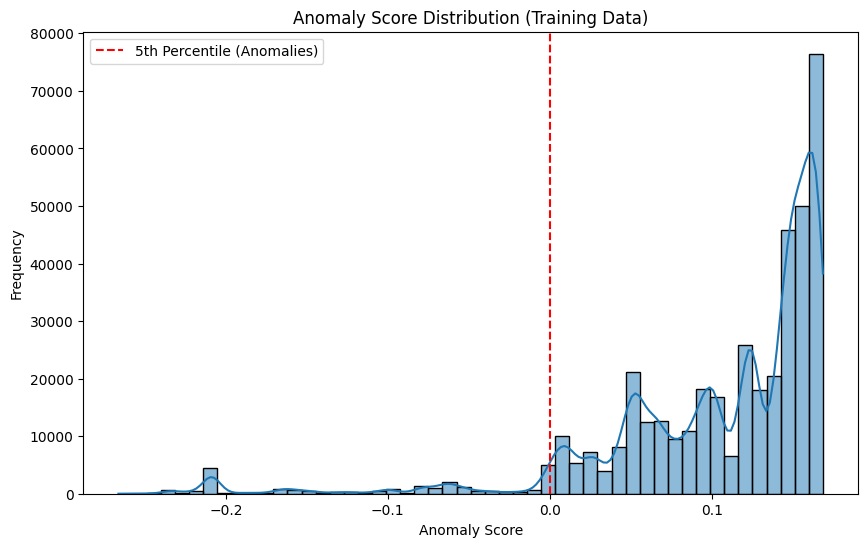

In [41]:

plt.figure(figsize=(10, 6))
sns.histplot(df.loc[train_indices, 'Anomaly_Score'], kde=True, bins=50)
#make 5th percentile as a threshold for anomalies.
plt.axvline(x=np.percentile(df.loc[train_indices, 'Anomaly_Score'], 5), color='r', linestyle='--', label='5th Percentile (Anomalies)')
plt.title("Anomaly Score Distribution (Training Data)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [42]:
#Filter flagged as anomalies (Is_Anomaly = -1)
anomalies = df.loc[train_indices][df.loc[train_indices, 'Is_Anomaly'] == -1]

Detected Anomalies:


In [43]:
anomalies

,BlockId,Label,Type,E1,E2,E3,E4,E5,E6,E7,...,TimeInterval,Latency,EventId,EventTemplate,Event_Count,TimeInterval_Mean,TimeInterval_Std,Label_Encoded,Anomaly_Score,Is_Anomaly
30498,blk_6942636090738560872,Success,Unknown,0,0,1,22,3,0,0,...,"[0.0, 0.0, 0.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",47524,NaN,Unknown,42,1159.121951,6378.420308,1,-0.104191,-1.0
117801,blk_-8610338082008383355,Fail,0.0,0,1,1,2,4,1,0,...,"[0.0, 0.0, 0.0, 47.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",36757,NaN,Unknown,30,1267.482759,5340.813664,0,-0.156792,-1.0
121412,blk_893722386776170438,Success,Unknown,0,1,1,15,3,0,0,...,"[0.0, 0.0, 0.0, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",36546,NaN,Unknown,36,1044.171429,4668.141101,1,-0.099489,-1.0
348913,blk_949722837986445994,Success,Unknown,0,2,0,0,3,0,0,...,"[0.0, 0.0, 4.0, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",24465,NaN,Unknown,15,1747.500000,5847.136989,1,-0.091426,-1.0
473387,blk_-7079719988670428024,Success,Unknown,0,1,0,0,3,0,0,...,"[0.0, 0.0, 1.0, 49.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",456,NaN,Unknown,14,35.076923,107.861351,1,-0.038930,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454589,blk_8735823784662388403,Fail,0.0,0,0,0,0,4,1,0,...,"[0.0, 1.0, 3.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6194,NaN,Unknown,28,229.407407,643.626316,0,-0.213402,-1.0
119176,blk_1561990732607754107,Success,Unknown,0,0,1,15,3,0,0,...,"[0.0, 0.0, 1.0, 65.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",36793,NaN,Unknown,35,1082.147059,4831.526882,1,-0.083118,-1.0
328947,blk_-2337626258059772694,Success,Unknown,0,1,0,0,3,0,0,...,"[0.0, 4.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",16269,NaN,Unknown,14,1251.461538,4325.093554,1,-0.061900,-1.0
84654,blk_8747015025512290420,Fail,21.0,0,0,8,0,3,0,0,...,"[0.0, 0.0, 1.0, 51.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",33199,NaN,Unknown,28,1229.592593,2872.848287,0,-0.055983,-1.0
